In [2]:
## this block is only for function definitions

import subprocess
import matplotlib.pyplot as plt
import time

def fibonacci(size, unit):
	runtimes = dict()
	units = {'µs':1, 'ms':1000, 's':1000000}
	# C
	# gcc -O0 fibonacci/fibonacci.c -o classes/fibonacci.out
	# classes/fibonacci.out <size>
	subprocess.run(['gcc', '-O0', 'fibonacci/fibonacci.c', '-o', 'classes/fibonacci.out'])
	fib_c = int(subprocess.run(['classes/fibonacci.out', size], stdout=subprocess.PIPE).stdout.decode('utf-8'))
	runtimes['C'] = int(fib_c / units[unit])
	# Java
	# javac -d classes fibonacci/fibonacci.java
	# java -cp classes fibonacci <size>
	subprocess.run(['javac', '-d', 'classes', 'fibonacci/fibonacci.java'])
	fib_java = int(subprocess.run(['java', '-cp', 'classes', 'fibonacci', size], stdout=subprocess.PIPE).stdout.decode('utf-8'))
	runtimes['Java'] = int(fib_java / units[unit])
	# Python
	# python3 fibonacci/fibonacci.py <size>
	fib_py = int(subprocess.run(['python3', 'fibonacci/fibonacci.py', size], stdout=subprocess.PIPE).stdout.decode('utf-8'))
	runtimes['Python'] = int(fib_py / units[unit])
	# Fortran
	# gfortran -O0 fibonacci/fibonacci.f90 -o classes/fibonacci.out
	# classes/fibonacci.out <size>
	subprocess.run(['gfortran', '-O0', 'fibonacci/fibonacci.f90', '-o', 'classes/fibonacci.out'])
	fib_c = int(subprocess.run(['classes/fibonacci.out', size], stdout=subprocess.PIPE).stdout.decode('utf-8'))
	runtimes['Fortran'] = int(fib_c / units[unit])
	return runtimes

def selection(size, unit): # sorts an array of size n where array[0] = n, array[n] = 0
	runtimes = dict()
	units = {'µs':1, 'ms':1000, 's':1000000}
	# C
	# gcc -O0 selection/Selection.c -o classes/selection.out
	# classes/selection.out <size>
	subprocess.run(['gcc', '-O0', 'selection/Selection.c', '-o', 'classes/selection.out'])
	sel_c = int(subprocess.run(['classes/selection.out', size], stdout=subprocess.PIPE).stdout.decode('utf-8'))
	runtimes['C'] = int(sel_c / units[unit])
	# Java
	# javac -d classes selection/Selection.java
	# java -cp classes Selection <size>
	subprocess.run(['javac', '-d', 'classes', 'selection/Selection.java'])
	sel_java = int(subprocess.run(['java', '-cp', 'classes', 'Selection', size], stdout=subprocess.PIPE).stdout.decode('utf-8'))
	runtimes['Java'] = int(sel_java / units[unit])
	# Python
	# python3 selection/Selection.py <size>
	sel_py = int(subprocess.run(['python3', 'selection/Selection.py', size], stdout=subprocess.PIPE).stdout.decode('utf-8'))
	runtimes['Python'] = int(sel_py / units[unit])
	return runtimes

def sum(size, unit): # each program returns time in µs
	# sum a list with each index value = its key
	runtimes = dict()
	units = {'µs':1, 'ms':1000, 's':1000000}
	# C
	# gcc -O0 sum/sum.c -o classes/sum.out
	# classes/sum.out <size>
	subprocess.run(['gcc', '-O0', 'sum/sum.c', '-o', 'classes/sum.out'])
	sum_c = int(subprocess.run(['classes/sum.out', size], stdout=subprocess.PIPE).stdout.decode('utf-8'))
	runtimes['C'] = int(sum_c / units[unit])
	# Java
	# javac -d classes sum/Sum.java
	# java -cp classes Sum <size>
	subprocess.run(['javac', '-d', 'classes', 'sum/Sum.java'])
	sum_java = int(subprocess.run(['java', '-cp', 'classes', 'Sum', size], stdout=subprocess.PIPE).stdout.decode('utf-8'))
	runtimes['Java'] = int(sum_java / units[unit])
	# Python
	# python3 sum/sum.py <size>
	sum_py = int(subprocess.run(['python3', 'sum/sum.py', size], stdout=subprocess.PIPE).stdout.decode('utf-8'))
	runtimes['Python'] = int(sum_py / units[unit])
	return runtimes

def matrixmult(size, unit): # each program returns time in µs
	# sum 2 2D matrices with index value equal to adding keys
	runtimes = {'size':size}
	units = {'µs':1, 'ms':1000, 's':1000000}
	# C
	# gcc -O0 matrixmult/MatrixMult.c -o classes/MatrixMult.out
	# classes/MatrixMult.out <size>
	subprocess.run(['gcc', '-O0', 'matrixmult/MatrixMult.c', '-o', 'classes/MatrixMult.out'])
	matrmult_c = int(subprocess.run(['classes/MatrixMult.out', size], stdout=subprocess.PIPE).stdout.decode('utf-8'))
	runtimes['C'] = int(matrmult_c / units[unit])
	# Java
	# javac -d classes matrixmult/MatrixMult.java
	# java -cp classes MatrixMult <size>
	subprocess.run(['javac', '-d', 'classes', 'matrixmult/MatrixMult.java'])
	matrmult_java = int(subprocess.run(['java', '-cp', 'classes', 'MatrixMult', size], stdout=subprocess.PIPE).stdout.decode('utf-8'))
	runtimes['Java'] = int(matrmult_java / units[unit])
	# Python
	# python3 matrixmult/MatrixMult.py
	matrmult_py = int(subprocess.run(['python3', 'matrixmult/MatrixMult.py', size], stdout=subprocess.PIPE).stdout.decode('utf-8'))
	runtimes['Python'] = int(matrmult_py / units[unit])
	# Fortran
	# gfortran -O0 matrixmult/MatrixMult.f90 -o classes/MatrixMult.out
	# classes/MatrixMult.out <size>
	subprocess.run(['gfortran', '-O0', 'matrixmult/MatrixMult.f90', '-o', 'classes/MatrixMult.out'])
	matrmult_for = int(subprocess.run(['classes/MatrixMult.out', size], stdout=subprocess.PIPE).stdout.decode('utf-8'))
	runtimes['Fortran'] = int(matrmult_for / units[unit])
	# graph
	return runtimes
	

benchmark completed in 48.16s


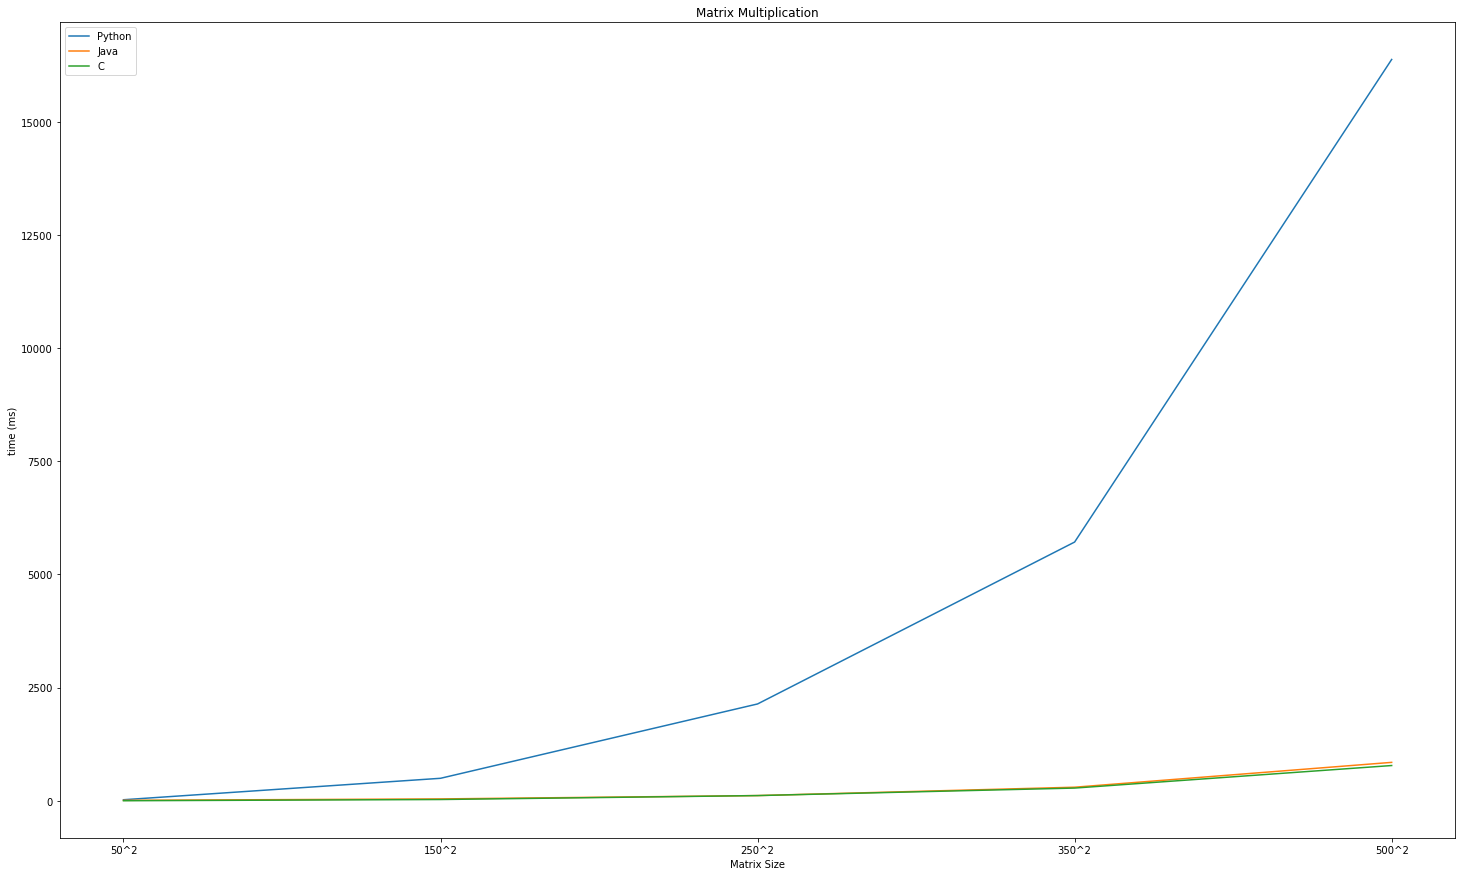

In [63]:
def graph_matrix_mult(runs):
	unit='ms'
	mult = dict()
	start = time.time_ns()
	for i in range(runs):	
		mult[i] = {'50^2' :matrixmult(size='50', unit=unit),
					#'100^2':matrixmult(size='100',unit=unit),
				   '150^2':matrixmult(size='150',unit=unit),
					#'200^2':matrixmult(size='200',unit=unit),
				   '250^2':matrixmult(size='250',unit=unit),
					#'300^2':matrixmult(size='300',unit=unit),
			       '350^2':matrixmult(size='350',unit=unit),
					#'400^2':matrixmult(size='400',unit=unit),
					#'450^2':matrixmult(size='450',unit=unit),
				   '500^2':matrixmult(size='500',unit=unit)}
	end = time.time_ns()
	benchmark_time = "{:.2f}".format((end-start)/1000/1000/1000)
	print(f"benchmark completed in {benchmark_time}s")
	c, java, py, fortran = [0] * 5, [0] * 5, [0] * 5, [0] * 5
	for i in range(runs):
		j = 0
		for value in mult[i].values():
			c[j] += value['C']
			java[j] += value['Java']
			py[j] += value['Python']
			fortran[j] += value['Fortran']
			j += 1
	for value in c:
		value = value / runs
	for value in java:
		value = value / runs
	for value in py:
		value = value / runs
	for value in fortran:
		value = value / runs
	plt.title('Matrix Multiplication')
	plt.rcParams['figure.figsize'] = [25, 15]
	plt.ylabel(f'time ({unit})')
	plt.xlabel(f'Matrix Size')
	plt.plot(mult[0].keys(), py, label='Python')
	plt.plot(mult[0].keys(), java, label='Java')
	plt.plot(mult[0].keys(), c, label='C')
	plt.plot(mult[0].keys(), fortran, label='Fortran')
	plt.legend()
	plt.show()
graph_matrix_mult(runs=3)

benchmark completed in 19.43s


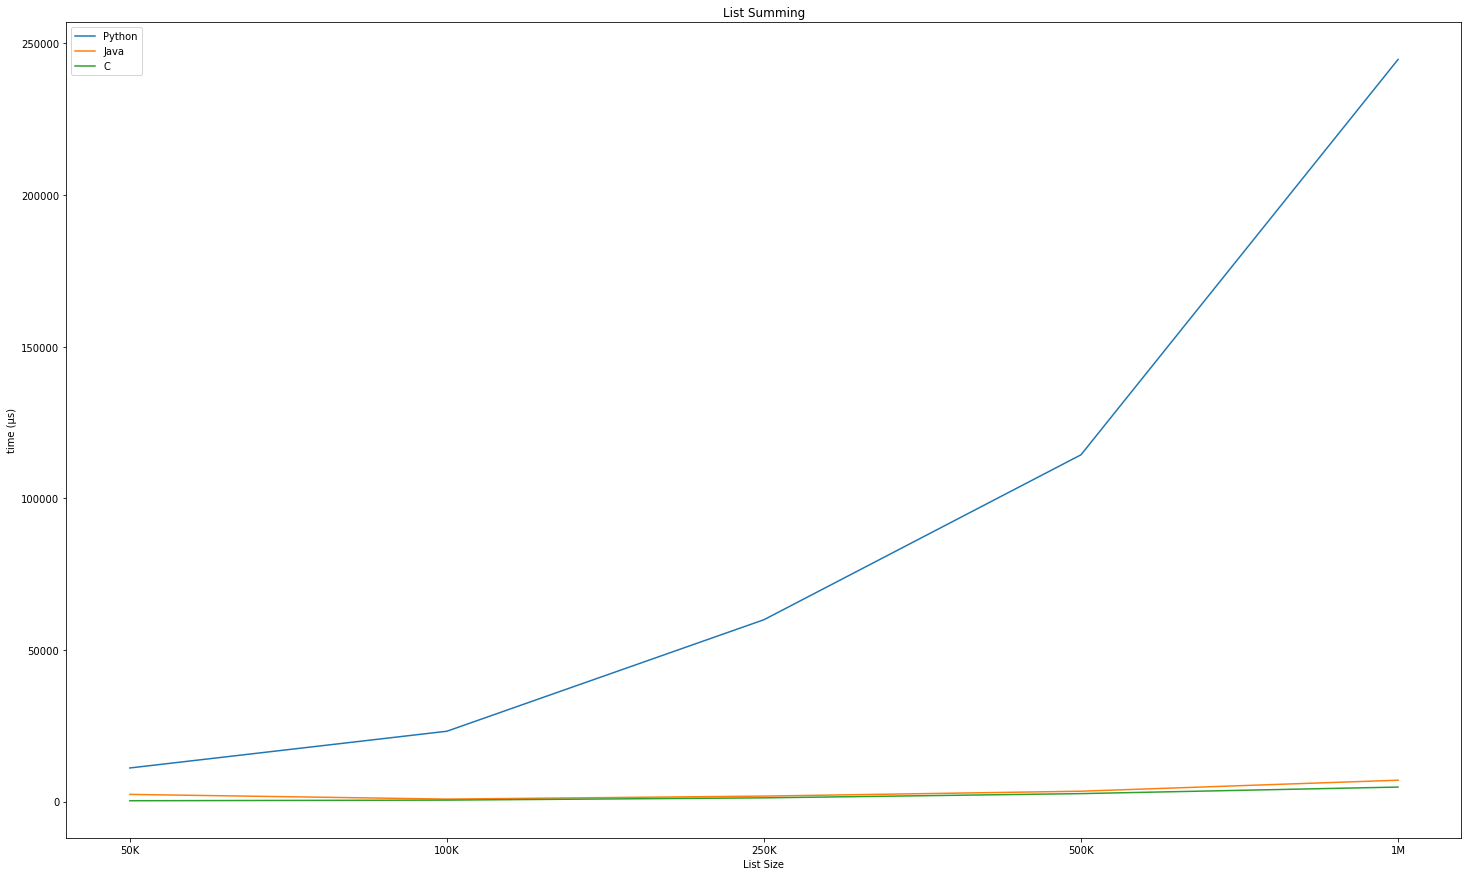

In [64]:
def graph_sum(runs):
	unit = 'µs'
	#unit = 'ms'
	# max = '1 000 000'
	sums = dict()
	start = time.time_ns()
	for i in range(runs):
		sums[i] = {'50K' :sum(size='50000'  ,unit=unit),
				  '100K':sum(size='100000' ,unit=unit),
				  '250K':sum(size='250000' ,unit=unit),
				  '500K':sum(size='500000' ,unit=unit),
				  '1M'  :sum(size='1000000',unit=unit)}
	end = time.time_ns()
	benchmark_time = "{:.2f}".format((end-start)/1000/1000/1000)
	print(f"benchmark completed in {benchmark_time}s")
	c, java, py = [0] * 5, [0] * 5, [0] * 5
	for i in range(runs):
		j = 0
		for value in sums[i].values():
			c[j] += value['C']
			java[j] += value['Java']
			py[j] += value['Python']
			j += 1
	for value in c:
		value = value / runs
	for value in java:
		value = value / runs
	for value in py:
		value = value / runs
	plt.title('List Summing')
	plt.rcParams['figure.figsize'] = [25, 15]
	plt.ylabel(f'time ({unit})')
	plt.xlabel(f'List Size')
	plt.plot(sums[0].keys(), py, label='Python')
	plt.plot(sums[0].keys(), java, label='Java')
	plt.plot(sums[0].keys(), c, label='C')
	plt.legend()
	plt.show()
graph_sum(runs=3)

benchmark completed in 19.59s


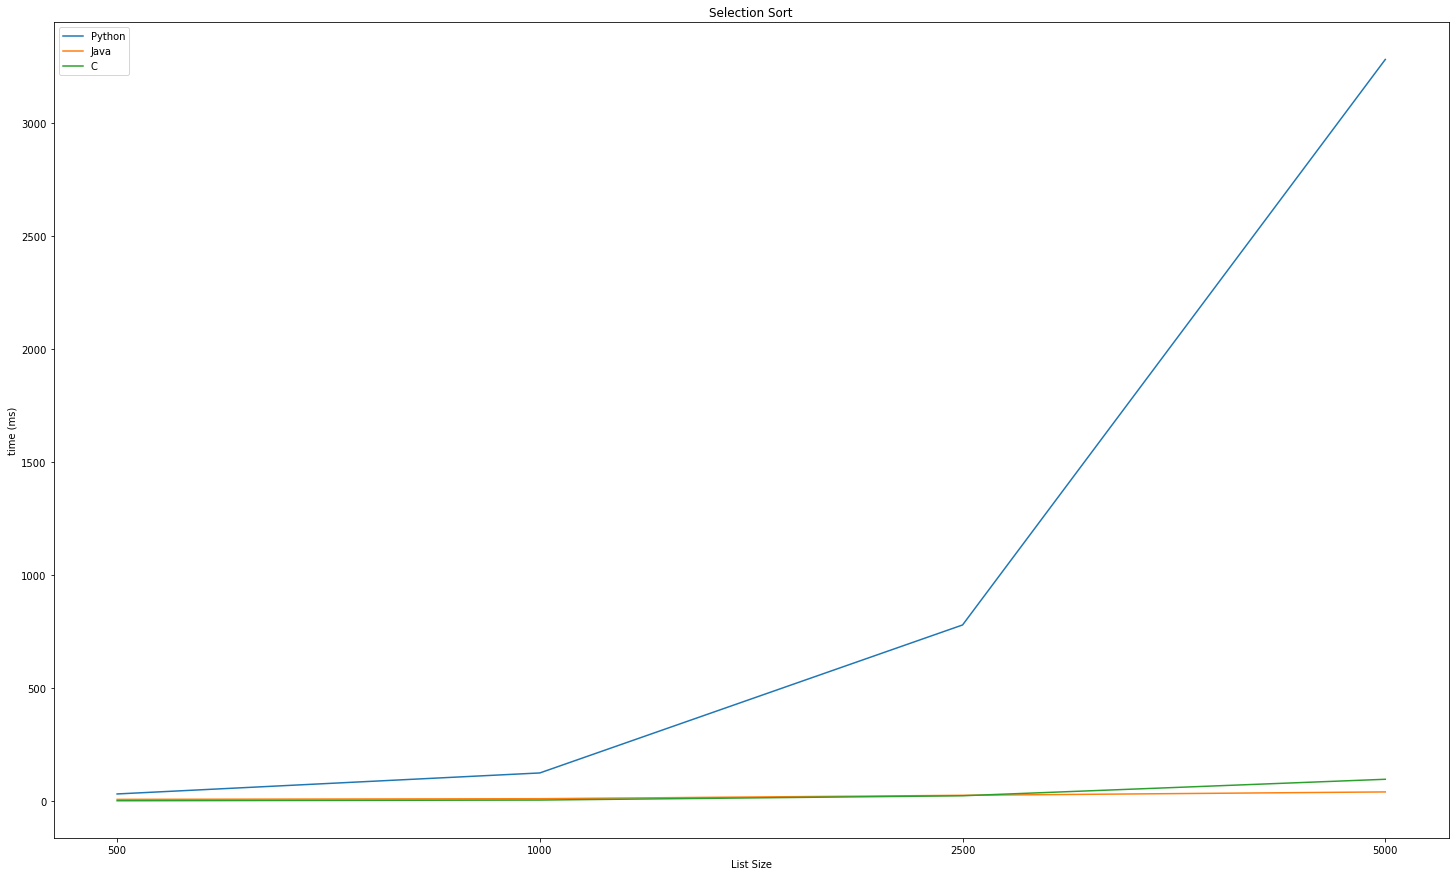

In [65]:
def graph_sel(runs):
	#unit = 'µs'
	unit = 'ms'
	sel = dict()
	start = time.time_ns()
	for i in range(runs):
		sel[i] = {'500' :selection(size='500' ,unit=unit),
				'1000':selection(size='1000',unit=unit),
				'2500':selection(size='2500',unit=unit),
				'5000':selection(size='5000',unit=unit)}
	end = time.time_ns()
	benchmark_time = "{:.2f}".format((end-start)/1000/1000/1000)
	print(f"benchmark completed in {benchmark_time}s")
	c, java, py = [0] * 4, [0] * 4, [0] * 4
	for i in range(runs):
		j = 0
		for value in sel[i].values():
			c[j] += value['C']
			java[j] += value['Java']
			py[j] += value['Python']
			j += 1
	for value in c:
		value = value / runs
	for value in java:
		value = value / runs
	for value in py:
		value = value / runs
	plt.title('Selection Sort')
	plt.rcParams['figure.figsize'] = [25, 15]
	plt.ylabel(f'time ({unit})')
	plt.xlabel(f'List Size')
	plt.plot(sel[0].keys(), py, label='Python')
	plt.plot(sel[0].keys(), java, label='Java')
	plt.plot(sel[0].keys(), c, label='C')
	plt.legend()
	plt.show()
graph_sel(runs=3)

benchmark completed in 42.03s


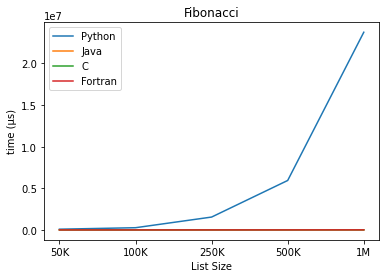

In [3]:
def graph_fib(runs):
	unit = 'µs'
	#unit = 'ms'
	fib = dict()
	start = time.time_ns()
	for i in range(runs):
		fib[i] = {'50K':fibonacci(size='50000',unit=unit),
				  '100K':fibonacci(size='100000',unit=unit),
				  '250K':fibonacci(size='250000',unit=unit),
				  '500K':fibonacci(size='500000',unit=unit),
				  '1M':fibonacci(size='1000000',unit=unit)}
	end = time.time_ns()
	benchmark_time = "{:.2f}".format((end-start)/1000/1000/1000)
	print(f"benchmark completed in {benchmark_time}s")
	c, java, py, fortran = [0] * 5, [0] * 5, [0] * 5, [0] * 5
	for i in range(runs):
		j = 0
		for value in fib[i].values():
			c[j] += value['C']
			java[j] += value['Java']
			py[j] += value['Python']
			fortran[j] += value['Fortran']
			j += 1
	for value in c:
		value = value / runs
	for value in java:
		value = value / runs
	for value in py:
		value = value / runs
	plt.title('Fibonacci')
	plt.rcParams['figure.figsize'] = [25, 15]
	plt.ylabel(f'time ({unit})')
	plt.xlabel(f'List Size')
	plt.plot(fib[0].keys(), py, label='Python')
	plt.plot(fib[0].keys(), java, label='Java')
	plt.plot(fib[0].keys(), c, label='C')
	plt.plot(fib[0].keys(), fortran, label='Fortran')
	plt.legend()
	plt.show()
graph_fib(runs=3)